In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"it20107000","key":"97ce19a40ef099331eec0dadff7546e8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uzairkhan45/breast-cancer-patients-mris

 86% 49.0M/56.9M [00:00<00:00, 56.0MB/s]
100% 56.9M/56.9M [00:00<00:00, 64.0MB/s]


In [ ]:
!unzip breast-cancer-patients-mris.zip

Archive:  breast-cancer-patients-mris.zip
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_1.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_10.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_100.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_101.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_102.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_103.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_104.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_105.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_106.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_107.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_108.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_109.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_11.jpg  
  inflating: Breast Cancer Patients MRI's/train/Healthy/H_110.jpg  
  inflatin

In [ ]:
mkdir /content/train_data

In [ ]:
mkdir /content/train_data/stage1

In [ ]:
mkdir /content/train_data/stage2

# Setup

In [ ]:
import numpy as np
import glob
import random
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

from PIL import Image

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight

from glob import glob
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

import time
import copy
from tqdm import tqdm_notebook as tqdm

from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image  # Add this import statement
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

random.seed(98)
np.random.seed(98)

In [ ]:
import tensorflow as tf
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
import matplotlib.pyplot as plt
import pickle
import PIL
from PIL import Image
from math import exp, tanh
from tokenize import Exponent
from enum import Enum
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import base64
import pandas as pd
import seaborn as sns
import uuid
import glob
import shutil

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#create benign image dataset without duplicates

# Get all png files from group of folders
png_files = glob.glob("/content/**/*/Healthy/*.jpg", recursive=True)[:20000]

# Move the png files to the dataset folder and filter duplicates
for png_file in png_files:
    if not os.path.exists("/content/train_data/stage1" + os.path.basename(png_file)):
        shutil.move(png_file, "/content/train_data/stage1")

In [ ]:
#create malignant image dataset without duplicates

# Get all png files in group of folders
png_files = glob.glob("/content/**/*/Sick/*.jpg", recursive=True)[:20000]

# Move the png files to the dataset folder
for png_file in png_files:
    if not os.path.exists("/content/train_data/stage2" + os.path.basename(png_file)):
        shutil.move(png_file, "/content/train_data/stage2")

In [ ]:
data_dir= "/content/train_data"

In [ ]:
# Define image size and batch size
image_size = (254, 254)
batch_size = 32

In [ ]:
# Create an ImageDataGenerator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into training and validation sets
)

# Load the dataset from the directory and split it into training and validation sets
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='training'  # Use the training split
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='validation'  # Use the validation split
)

Found 625 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


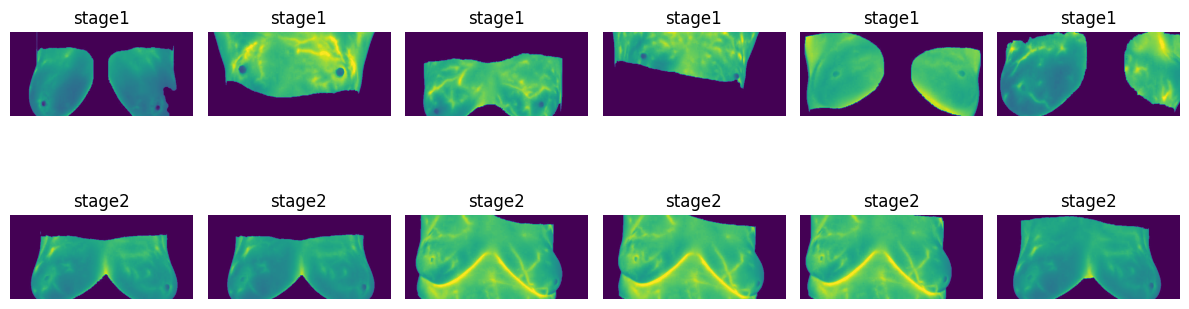

In [ ]:
# Check the number of files in "stage1" and "stage2" folders
stage1_paths = glob.glob("/content/train_data/stage1/*.jpg")
stage2_paths = glob.glob("/content/train_data/stage2/*.jpg")

if not stage1_paths:
    print("No images found in 'stage1' folder.")
else:
    # Randomly select a few samples for display from "stage1" patches
    sample_size = 6  # You can change this to the number of samples you want to display

    plt.figure(figsize=(12, 6))
    for i in range(sample_size):
        plt.subplot(3, sample_size, i + 1)
        img = mpimg.imread(random.choice(stage1_paths))
        plt.imshow(img)
        plt.axis('off')
        plt.title('stage1')

if not stage2_paths:
    print("No images found in 'stage2' folder.")
else:
    # Randomly select a few samples for display from "stage2" patches
    for i in range(sample_size):
        plt.subplot(3, sample_size, i + sample_size + 1)
        img = mpimg.imread(random.choice(stage2_paths))
        plt.imshow(img)
        plt.axis('off')
        plt.title('stage2')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the image size
IMG_SIZE = (224, 224)  # ResNet's default input size
NUM_SAMPLES_PER_CLASS = 525

# Define lists to store features (X) and labels (y)
X = []
y = []

# Define a function to extract features and labels
def extract_features_labels(sample_paths, label_value):
    count = 0
    for path in sample_paths:
        if count >= NUM_SAMPLES_PER_CLASS:
            break
        img = load_img(path, target_size=IMG_SIZE)
        img = img_to_array(img)
        img = preprocess_input(img)
        X.append(img)
        y.append(label_value)
        count += 1

# Extract features and labels for stage1 samples (up to 100)
extract_features_labels(stage1_paths, label_value=0)

# Extract features and labels for stage2 samples (up to 100)
extract_features_labels(stage2_paths, label_value=1)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
shuffled_indices = np.arange(len(y))
np.random.shuffle(shuffled_indices)
X = X[shuffled_indices]
y = y[shuffled_indices]

# Check the shape of the features and labels arrays
print("Features shape:", X.shape)
print("Labels shape:", y.shape)




Features shape: (566, 224, 224, 3)
Labels shape: (566,)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the data into train, test, and predict sets
X_train, X_predict, y_train, y_true = train_test_split(X, y, test_size=0.3, random_state=7)

# Define the ratio for reducing the size of the train and test sets
rate = 0.5
num = int(X_train.shape[0] * rate)

# Reduce the size of the train and test sets
X_test = X_train[num:]
X_train = X_train[:num]

y_test = y_train[num:]
y_train = y_train[:num]

# Convert labels to categorical format
num_classes = 2  # Update to 2 classes (stage1 and stage2)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_true = to_categorical(y_true, num_classes)

# Print the shapes of the datasets
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('X_predict shape: {}'.format(X_predict.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))
print('y_true shape: {}'.format(y_true.shape))


X_train shape: (198, 224, 224, 3)
X_test shape: (198, 224, 224, 3)
X_predict shape: (170, 224, 224, 3)
y_train shape: (198, 2)
y_test shape: (198, 2)
y_true shape: (170, 2)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,            # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,      # Randomly shift images vertically (fraction of total height)
    zoom_range=0.2,              # Randomly zoom in on images
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill mode for filling in newly created pixels after augmentation
)

In [ ]:
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False)

94668760/94668760 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained ResNet50 model with custom classification layers
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

# Create a Sequential model for your custom classification task
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # Update to 3 classes (BENIGN, MALIGNANT, NORMAL)
])

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Print the summary of the model
model.summary()


219055592/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 54730722 (208.78 MB)
Trainable params: 393986 (1.50 MB)
Non-trainable params: 54336736 (207.28 MB)
________

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.0001

# Create the Adam optimizer with the specified learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Compile the model with categorical cross-entropy loss and the Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Model Train

In [ ]:
# Define the number of epochs and batch size
num_epochs = 40
batch_size = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # Metric to monitor (e.g., validation loss)
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Verbosity mode (0: quiet, 1: update messages)
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

In [ ]:
train_datagen = datagen.flow(X_train, y_train, batch_size=batch_size)

In [ ]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

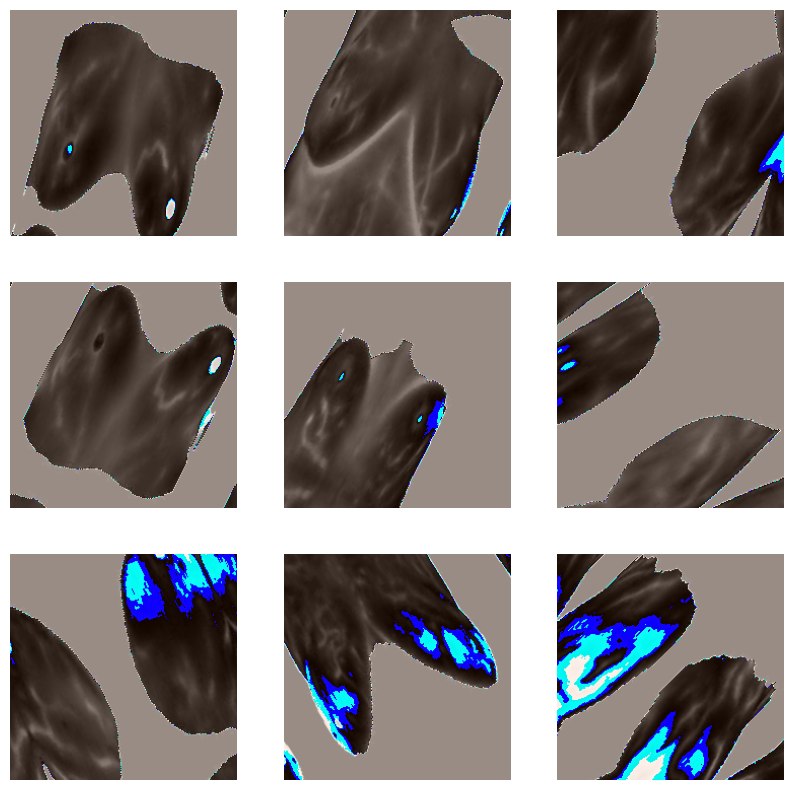

In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    preprocessing_function=data_augmentation
)

# Create a generator to generate augmented images
augmented_images_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images, _ = next(augmented_images_generator)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].astype("uint8"))
    plt.axis("off")

plt.show()


In [ ]:
# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,            # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,      # Randomly shift images vertically (fraction of total height)
    zoom_range=0.2,              # Randomly zoom in on images
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill mode for filling in newly created pixels after augmentation
)

# Apply data augmentation to the train dataset using .flow()
train_ds = datagen.flow(X_train, y_train, batch_size=batch_size)

# You can also set other parameters like shuffle and prefetch
# train_ds = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
# train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(254, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 3 output classes (stage1, stage2)

In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])


In [34]:
# Train the model
epochs = 40
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

Epoch 1/40
20/20 [==============================] - 43s 1s/step - loss: 0.2680 - accuracy: 0.8896 - val_loss: 0.1880 - val_accuracy: 0.9487
Epoch 2/40
20/20 [==============================] - 14s 724ms/step - loss: 0.1408 - accuracy: 0.9504 - val_loss: 0.1076 - val_accuracy: 0.9679
Epoch 3/40
20/20 [==============================] - 14s 720ms/step - loss: 0.1096 - accuracy: 0.9648 - val_loss: 0.1002 - val_accuracy: 0.9551
Epoch 4/40
20/20 [==============================] - 14s 701ms/step - loss: 0.0920 - accuracy: 0.9680 - val_loss: 0.0699 - val_accuracy: 0.9744
Epoch 5/40
20/20 [==============================] - 14s 710ms/step - loss: 0.0809 - accuracy: 0.9664 - val_loss: 0.0912 - val_accuracy: 0.9615
Epoch 6/40
20/20 [==============================] - 14s 718ms/step - loss: 0.0603 - accuracy: 0.9824 - val_loss: 0.0845 - val_accuracy: 0.9808
Epoch 7/40
20/20 [==============================] - 16s 807ms/step - loss: 0.0552 - accuracy: 0.9856 - val_loss: 0.0891 - val_accuracy: 0.9744
Ep

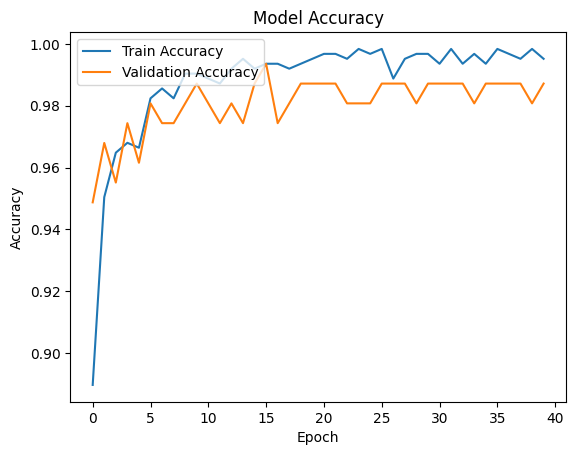

In [35]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

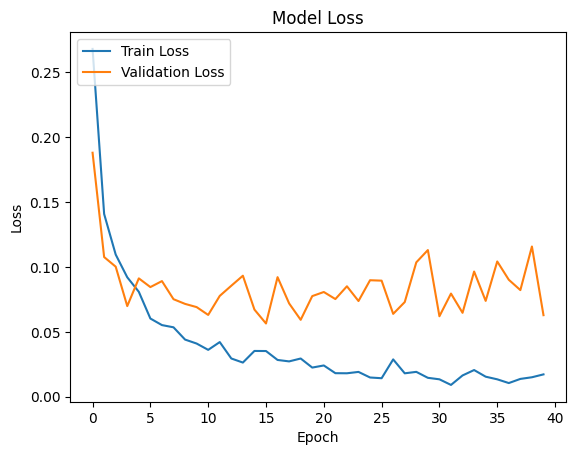

In [36]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

6/6 [==============================] - 13s 617ms/step
Accuracy: 0.9118
Precision: 0.8313
Recall: 0.9118
F1 Score: 0.8697


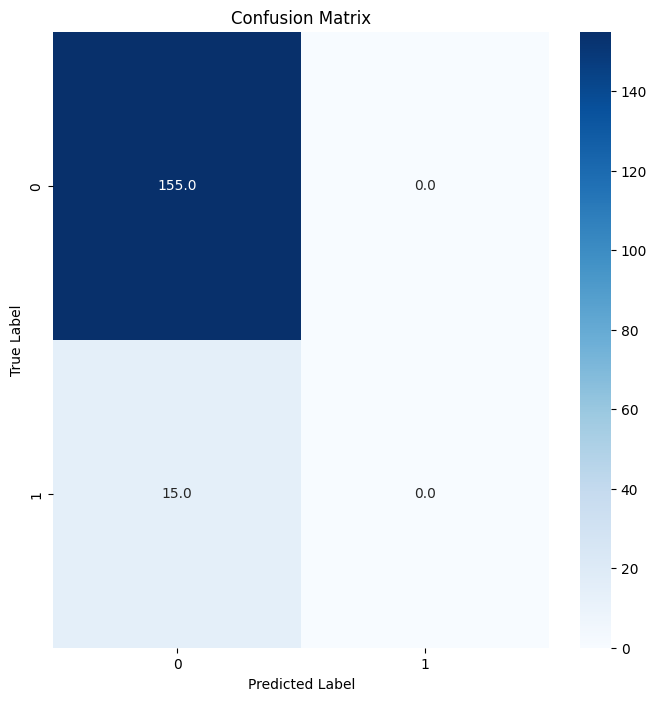

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Assuming you have predicted labels
predicted_labels = model.predict(X_predict)

# Calculate accuracy
accuracy = accuracy_score(y_true.argmax(axis=1), predicted_labels.argmax(axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(y_true.argmax(axis=1), predicted_labels.argmax(axis=1), average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_true.argmax(axis=1), predicted_labels.argmax(axis=1), average='weighted')
f1 = f1_score(y_true.argmax(axis=1), predicted_labels.argmax(axis=1), average='weighted')
conf_matrix = confusion_matrix(y_true.argmax(axis=1), predicted_labels.argmax(axis=1))

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Print the training and validation metrics
print("Training history:")
print(history.history)

Training history:
{'loss': [0.26804104447364807, 0.14084218442440033, 0.10956677049398422, 0.09204525500535965, 0.08085295557975769, 0.06026054173707962, 0.055208783596754074, 0.0534963384270668, 0.04403958097100258, 0.040980104357004166, 0.03611735999584198, 0.04211556538939476, 0.029467495158314705, 0.026324082165956497, 0.03527871519327164, 0.03521536663174629, 0.02833859808743, 0.0272272489964962, 0.02945408597588539, 0.02246769890189171, 0.024090787395834923, 0.018140485510230064, 0.018070301041007042, 0.019121486693620682, 0.014817092567682266, 0.014264324679970741, 0.028761547058820724, 0.018043100833892822, 0.01916227489709854, 0.01457477081567049, 0.013418431393802166, 0.00909754354506731, 0.016399133950471878, 0.020561983808875084, 0.01544250175356865, 0.013415628112852573, 0.010531316511332989, 0.013731447048485279, 0.015000658109784126, 0.017219573259353638], 'accuracy': [0.8895999789237976, 0.9503999948501587, 0.9648000001907349, 0.9679999947547913, 0.9664000272750854, 0.9

In [39]:
# Display sample images from the validation set
sample_batch = next(val_data)  # Get a batch of validation data
sample_images, sample_labels = sample_batch
sample_predictions = model.predict(sample_images)

1/1 [==============================] - 7s 7s/step


In [40]:
# Define class labels
class_labels = ['stage1', 'stage2']

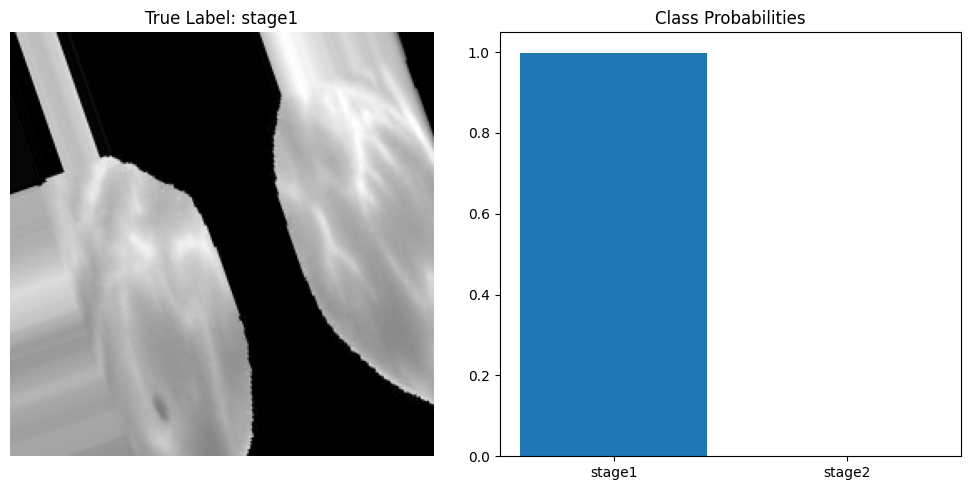

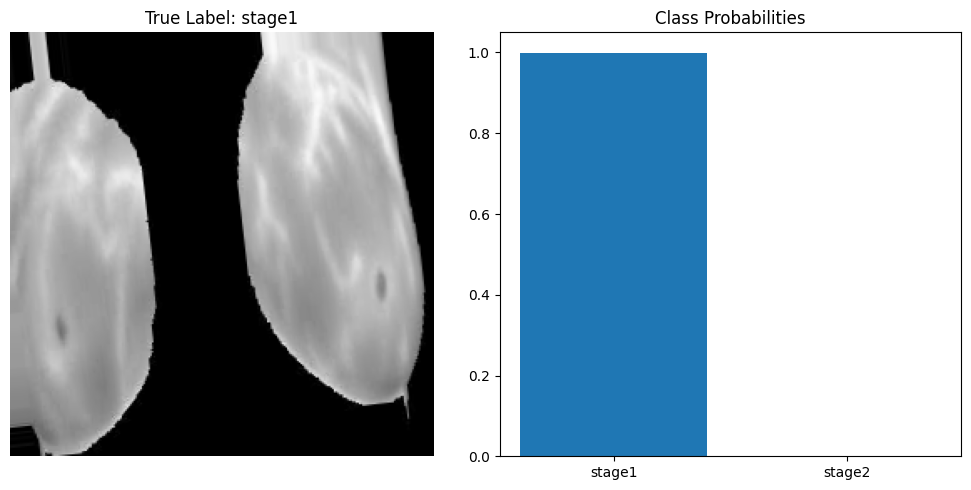

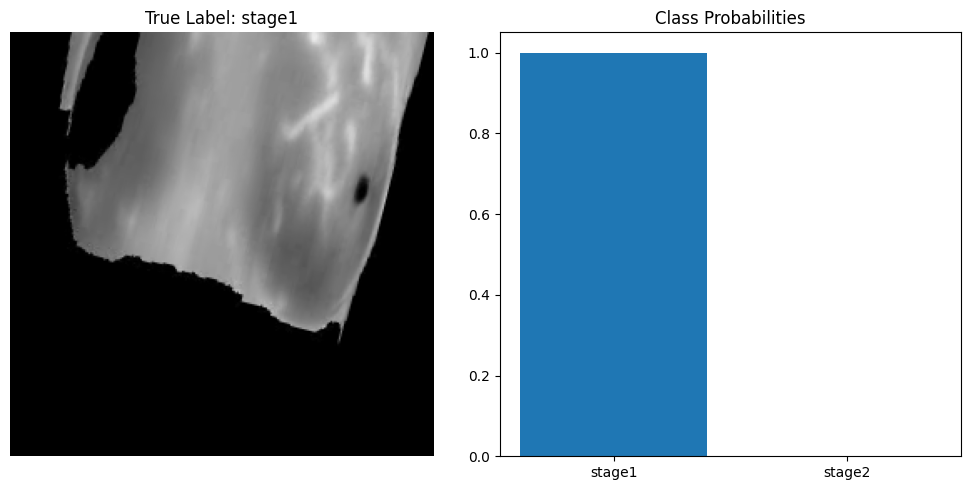

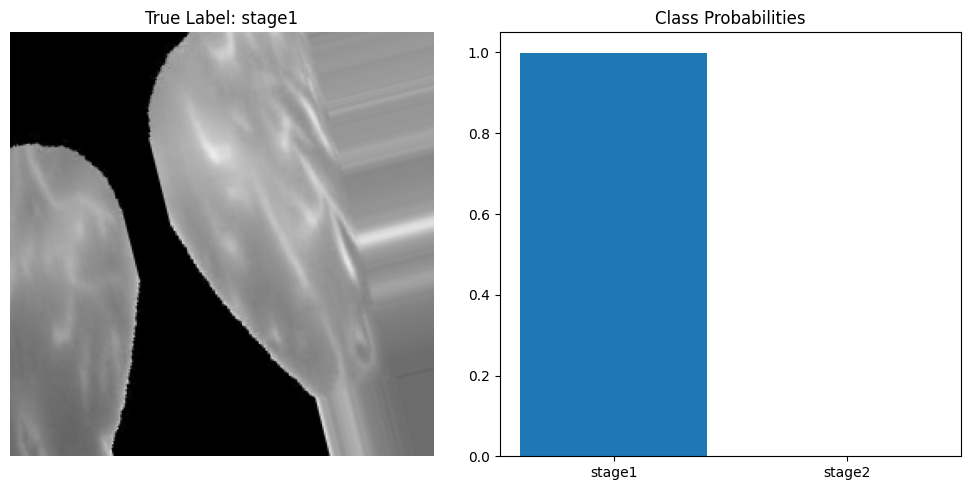

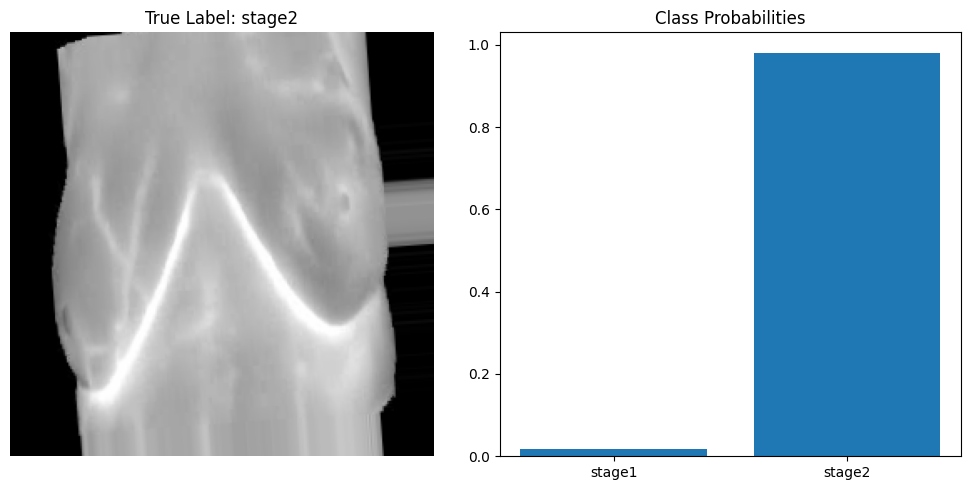

In [41]:
# Display the first few sample images and their predictions
num_samples = min(5, batch_size)
for i in range(num_samples):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_images[i])
    plt.title(f"True Label: {class_labels[sample_labels[i].argmax()]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(class_labels, sample_predictions[i])
    plt.title("Class Probabilities")
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 1s 895ms/step


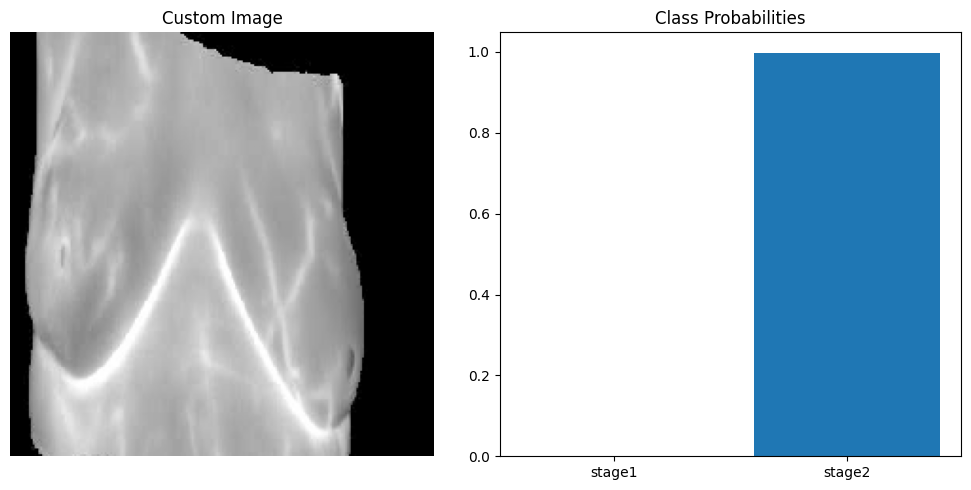

In [42]:
  # Define image size and batch size
image_size = (224, 224)

# Load your custom image for display
custom_image_path = "/content/Breast Cancer Patients MRI's/validation/Sick/S_42.jpg"
custom_image = image.load_img(custom_image_path, target_size=image_size)
custom_image = image.img_to_array(custom_image)
custom_image = custom_image / 255.0  # Normalize the pixel values to [0, 1]
custom_image = np.expand_dims(custom_image, axis=0)  # Add a batch dimension

# Make predictions on the custom image
custom_predictions = model.predict(custom_image)

# Display the custom image and its predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(custom_image[0])
plt.title("Custom Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.bar(class_labels, custom_predictions[0])
plt.title("Class Probabilities")
plt.tight_layout()
plt.show()